In [1]:
import python_utils as utils
import sys
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import neurodsp
import re
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
#messo n_parseg = 150 e sembra avere senso lo spettrogramma anche se non sono 100 come nell'articolo
parseg = 100

# Trovare $\tau$

In [3]:
Dd = "0.95"
function = "flat"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione
function_only = re.sub(r"[^a-zA-Z]", "", function) #lascia solo nome funzione

In [4]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [5]:
#funzione Dd
data1 = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s1 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data1[0]))

In [6]:
tau1, tau3 = s1.threshold(pop=subnets, res=1., N_parseg=parseg, save_img = periodogram_path + "/periodogram.png")

nparseg = 100	noverlap=20


In [7]:
Dd = "0.85"
function = "flat"
subnets = "STN"
sigm_par = float('inf')

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione
function_only = re.sub(r"[^a-zA-Z]", "", function) #lascia solo nome funzione

In [8]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [9]:
#funzione Dd
data2 = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s2 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data2[0]))

In [10]:
tau2, tau4 = s2.threshold(pop=subnets, res=1., N_parseg=parseg, save_img = periodogram_path + "/periodogram.png")

nparseg = 100	noverlap=20


In [11]:
#s.info()

#s2.histogram('all', res = 10., dd_par= sigm_par, save_img = periodogram_path + "/activity" + new_function + ".png")

In [12]:
#dopamine depletion periodogram
#s2.periodogramdd(pop=subnets, data=data1, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

In [13]:
#s2.threshold_imgs(pop=subnets, res=1., N_parseg=parseg), save_img = *)

In [14]:
print(tau1)
print(tau2)
print(tau3)
print(tau4)

0.3944347929071328
0.03321114099673823
0.2680956278444282
0.022177736759731198


In [15]:
tau = (tau1 + tau2)/2
print(tau)

0.2138229669519355


In [16]:
tau_mean = (tau3 + tau4)/2
print(tau_mean)

0.1451366823020797


# FLAT 0.85

nparseg = 100	noverlap=20
frequenza del massimo: 20.0
valore del massimo: 18.15809158617938


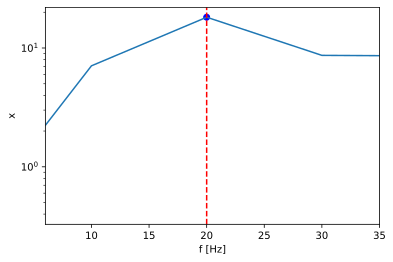

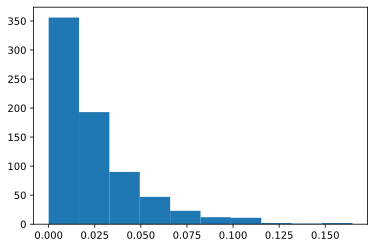

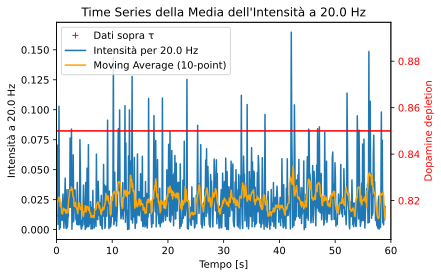

In [17]:
data = data2
output=s2.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)


plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('x')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.show()

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= tau], Sxx_max_index[Sxx_max_index >= tau], '+r', label='Dati sopra \u03C4')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz')
plt.show()

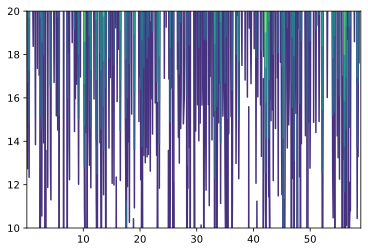

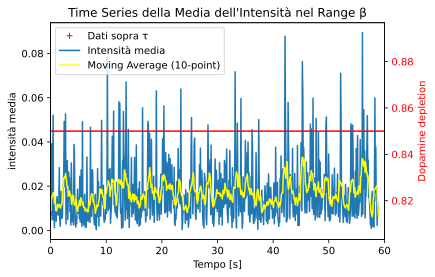

In [18]:
mask = (8 < f) & (f < 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= tau_mean], pow_t[pow_t >= tau_mean], '+r', label='Dati sopra \u03C4')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Time Series della Media dell\'Intensità nel Range \u03B2')
plt.show()

In [19]:
utils.burst_sequence((Sxx_max_index>=tau)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(0, [], 0)

In [20]:
utils.burst_sequence((pow_t>=tau_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(0, [], 0)

# FLAT 0.95

nparseg = 100	noverlap=20
frequenza del massimo: 20.0
valore del massimo: 225.64728334358182


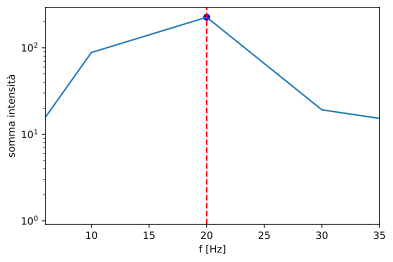

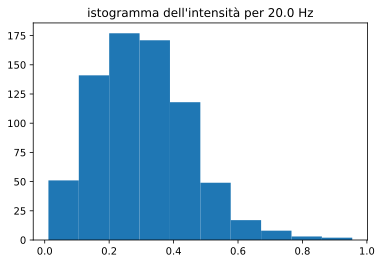

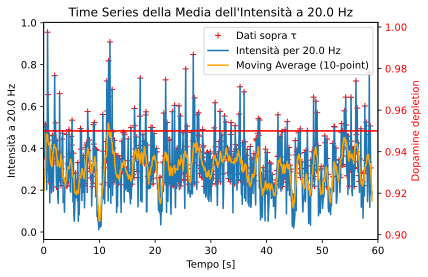

In [21]:
data = data1
output=s1.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= tau], Sxx_max_index[Sxx_max_index >= tau], '+r', label='Dati sopra \u03C4')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz')
plt.show()

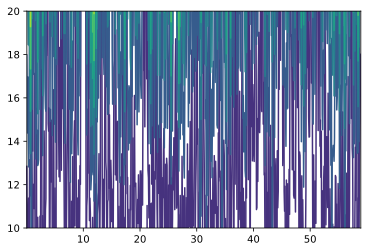

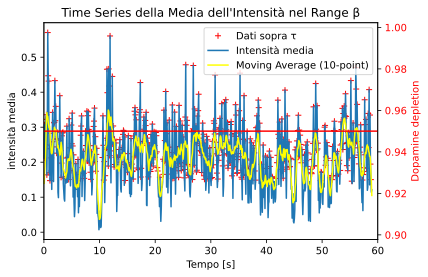

In [22]:
mask = (8 < f) & (f < 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= tau_mean], pow_t[pow_t >= tau_mean], '+r', label='Dati sopra \u03C4')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Time Series della Media dell\'Intensità nel Range \u03B2')
plt.show()

In [23]:
utils.burst_sequence((Sxx_max_index>=tau)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(9, [119, 118, 57, 221, 13, 5, 15, 8, 86], 71.33333333333333)

In [24]:
utils.burst_sequence((pow_t>=tau_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(8, [119, 130, 247, 22, 13, 5, 17, 107], 82.5)

# SIGMOID9

In [25]:
#tau trovato sopra trascritto in modo da evitare calcoli
#tau = 0.2573329144325134
#tau_mean = 0.16799556857190273

In [26]:
Dd = "0.95"
function = "sigmoid9"
subnets = "STN"
sigm_par = 0.00005

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione
function_only = re.sub(r"[^a-zA-Z]", "", function) #lascia solo nome funzione

In [27]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [28]:
#funzione Dd
data3 = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s3 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data3[0]))

In [29]:
#dopamine depletion periodogram
#s3.periodogramdd(pop=subnets, data=data3, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 100	noverlap=20
frequenza del massimo: 20.0
valore del massimo: 850.2667329027346


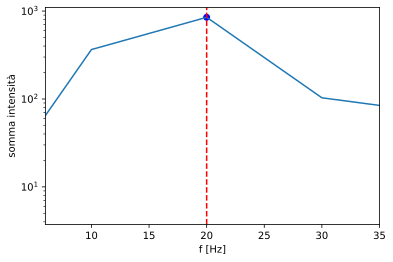

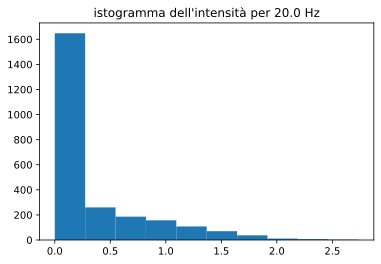

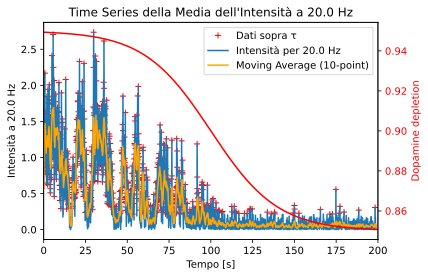

In [30]:
data = data3
output=s3.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083

# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= tau], Sxx_max_index[Sxx_max_index >= tau], '+r', label='Dati sopra \u03C4')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz')
plt.show()

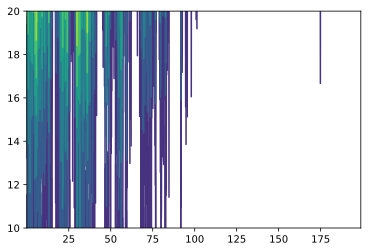

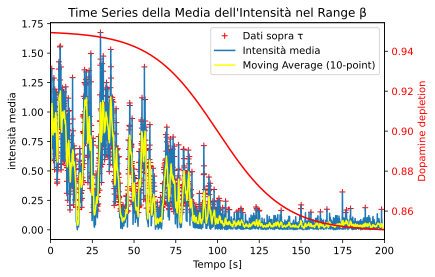

In [31]:
mask = (8 < f) & (f < 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= tau_mean], pow_t[pow_t >= tau_mean], '+r', label='Dati sopra \u03C4')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Time Series della Media dell\'Intensità nel Range \u03B2')
plt.show()

In [32]:
utils.burst_sequence((Sxx_max_index>=tau)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(10, [195, 311, 74, 64, 49, 112, 13, 77, 13, 21], 92.9)

In [33]:
utils.burst_sequence((pow_t>=tau_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(13, [195, 111, 185, 74, 64, 21, 18, 112, 13, 77, 15, 8, 9], 69.38461538461539)

# SIGMOID10

In [34]:
#tau trovato sopra trascritto in modo da evitare calcoli
#tau = 0.2573329144325134
#tau_mean = 0.16799556857190273

In [35]:
Dd = "0.95"
function = "sigmoid10"
subnets = "STN"
sigm_par = 0.00006

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione
function_only = re.sub(r"[^a-zA-Z]", "", function) #lascia solo nome funzione

In [36]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [37]:
#funzione Dd
data4 = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s4 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data3[0]))

In [38]:
#dopamine depletion periodogram
#s3.periodogramdd(pop=subnets, data=data3, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 100	noverlap=20
frequenza del massimo: 20.0
valore del massimo: 451.27399404777725


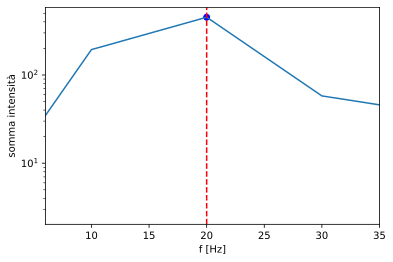

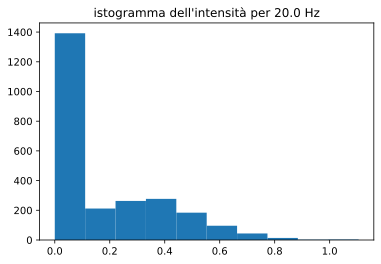

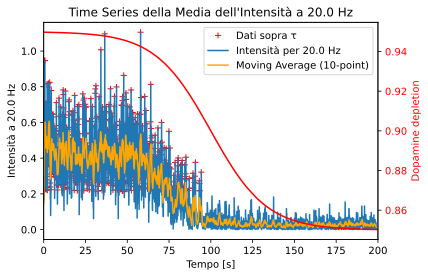

In [39]:
data = data4
output=s4.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= tau], Sxx_max_index[Sxx_max_index >= tau], '+r', label='Dati sopra \u03C4')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz')
plt.show()

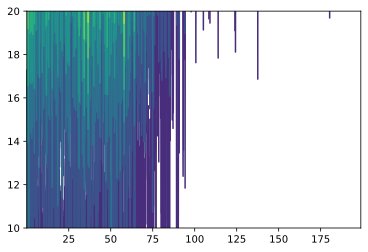

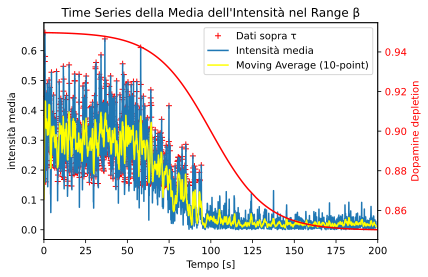

In [40]:
mask = (8 < f) & (f < 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= tau_mean], pow_t[pow_t >= tau_mean], '+r', label='Dati sopra \u03C4')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Time Series della Media dell\'Intensità nel Range \u03B2')
plt.show()

In [41]:
utils.burst_sequence((Sxx_max_index>=tau)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(6, [783, 95, 57, 14, 6, 10], 160.83333333333334)

In [42]:
utils.burst_sequence((pow_t>=tau_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(5, [46, 899, 14, 6, 10], 195.0)

# SIGMOID11

In [43]:
#tau trovato sopra trascritto in modo da evitare calcoli
#tau = 0.2573329144325134
#tau_mean = 0.16799556857190273

In [44]:
Dd = "0.95"
function = "sigmoid11"
subnets = "STN"
sigm_par = 0.00004

new_Dd = Dd.replace('.','_')
new_function = re.sub(r"[^0-9]", "", function) #lascia solo numero funzione
function_only = re.sub(r"[^a-zA-Z]", "", function) #lascia solo nome funzione

In [45]:
#check if periodogram folder exists and if not create one
periodogram_path = './periodograms/' + new_Dd + '_' + subnets + '_' + function
if not os.path.exists(periodogram_path):
    os.makedirs(periodogram_path)    

In [46]:
#funzione Dd
data5 = np.loadtxt("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6/ext_rateD2.txt").T
#spikesim
s5 = utils.SpikeSim("./build/output/n1/" + function + "_0.00_0.0000_0.00_" + Dd + "_1.00_1.00_1.6", 'new_sim_parallel.yaml', 1000, np.max(data5[0]))

In [47]:
#dopamine depletion periodogram
#s5.periodogramdd(pop=subnets, data=data3, dd_par=sigm_par, res=1., N_parseg=parseg, save_img = periodogram_path + "/"+ subnets + new_function + "_periodogram.png")

nparseg = 100	noverlap=20
frequenza del massimo: 10.0
valore del massimo: 276.0091573796257


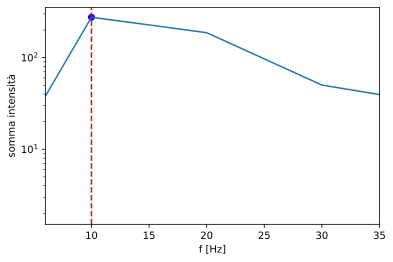

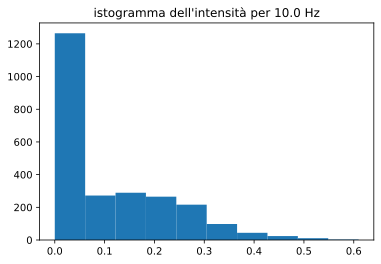

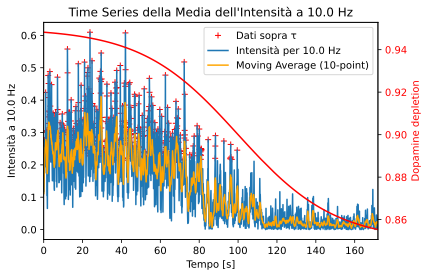

In [48]:
data = data5
output=s5.periodogram(pop=subnets, res=1., N_parseg=parseg, save_img=periodogram_path + "/periodogram.png")
f = output[0]
t = output[1]
Sxx = output[2]
data[0] = data[0]/1000
data[1] = data[1]/1.083


# faccio somma nel tempo per trovare frequenza max #######################################################
sum1 = np.sum(Sxx, axis=1) #somma per tutte frequenze

# Ottieni l'indice del massimo della funzione
max_index = np.argmax(sum1)
max_value = sum1[max_index]
print('frequenza del massimo:', f[max_index])
print('valore del massimo:', max_value)

plt.figure()
plt.plot(f, sum1)
plt.xlabel('f [Hz]')
plt.xlim(6, 35)
plt.ylabel('somma intensità')
plt.yscale('log')

# Traccia una riga verticale sul massimo
plt.axvline(x=f[max_index], color='red', linestyle='--')
# Aggiungi un punto sul massimo
plt.scatter(f[max_index], max_value, color='blue', marker='o')
plt.show()

# 2Estrarre la colonna corrispondente all'indice max_index #########################################################
Sxx_max_index = Sxx[max_index, :]

plt.hist(Sxx_max_index)
plt.title(f'istogramma dell\'intensità per {f[max_index]:.1f} Hz')
plt.show()

# Creare un grafico dei valori nel tempo #####################################################################
fig, ax1 = plt.subplots()

ax1.plot(t[Sxx_max_index >= tau], Sxx_max_index[Sxx_max_index >= tau], '+r', label='Dati sopra \u03C4')
ax1.plot(t, Sxx_max_index, label=f'Intensità per {f[max_index]:.1f} Hz')

# Aggiungi la moving average al grafico di ax1
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(Sxx_max_index, np.ones(window_size)/window_size, mode='same')
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='orange')

plt.xlabel('Tempo [s]')
plt.ylabel(f'Intensità a {f[max_index]:.1f} Hz')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')


plt.title(f'Time Series della Media dell\'Intensità a {f[max_index]:.1f} Hz')
plt.show()

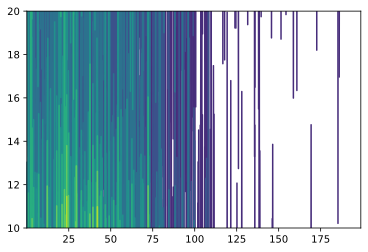

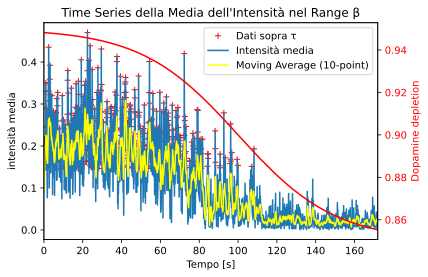

In [49]:
mask = (8 < f) & (f < 26)
Sxx_lim = Sxx[mask,:]
f_lim = f[mask]
plt.contour(t,f_lim,Sxx_lim)
plt.show()


pow_t = []
for i in range(len(t)):
    pow_t.append( np.mean(Sxx_lim[:, i]) )

# Creare un grafico dei valori nel tempo
# Finestra mobile (rolling window) per il calcolo della moving average
window_size = 10  # Sostituisci con la dimensione della finestra desiderata
moving_avg = np.convolve(pow_t, np.ones(window_size)/window_size, mode='same')

# Creare un grafico dei valori nel tempo
fig, ax1 = plt.subplots()

pow_t = np.array(pow_t)

# Plot dei dati originali
ax1.plot(t[pow_t >= tau_mean], pow_t[pow_t >= tau_mean], '+r', label='Dati sopra \u03C4')
ax1.plot(t, pow_t, label='Intensità media')

# Aggiungi la moving average al grafico di ax1
ax1.plot(t, moving_avg, label=f'Moving Average ({window_size}-point)', color='yellow')

plt.xlabel('Tempo [s]')
plt.ylabel('intensità media')
plt.legend()

ax2 = ax1.twinx()
ax2.plot(data[0], data[1], 'r-')
ax2.set_xlim(0, data[0][-1])
ax2.set_ylabel('Dopamine depletion', color='r')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Time Series della Media dell\'Intensità nel Range \u03B2')
plt.show()

In [50]:
utils.burst_sequence((Sxx_max_index>=tau)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(19,
 [5, 38, 23, 23, 19, 135, 29, 21, 26, 14, 20, 31, 12, 15, 30, 15, 26, 20, 5],
 26.68421052631579)

In [51]:
utils.burst_sequence((pow_t>=tau_mean)*1)

numero di burst, lunghezza di ogni burst, lunghezza media: 

(7, [137, 362, 107, 98, 26, 38, 5], 110.42857142857143)